Name: Vitoria Tai

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [ ]:
#importing pandas since we are dealing with Data Frames 
import pandas as pd

In [ ]:
#readign the csv file on the titanic passengers 
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In [ ]:
#reading the frst 5 elements in the titanic data 
train.head()
#the data frame shows the first 5 elements, and columns
#we are dealing with passanger class (1, 2, 3)
#names, sex, age, sibsp, parch, ticket#, fare, cabin, embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Exploratory Data Analysis)

In [ ]:
#importing seaborn since we are using heapmaps
import seaborn as sns

In [ ]:
#importing %matplotlib to plot the data in a specific graph plot 
%matplotlib inline
import matplotlib.pyplot as plt

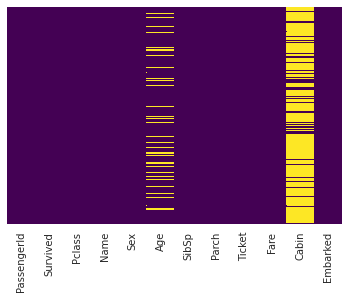

In [ ]:
#this shows a heap map with y values. 
#the purple means complete data (as in nothing is missing)
#the yellow means missing data. in this part, age and cabin has missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Class


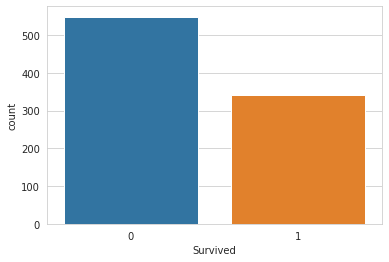

In [ ]:
#used a whitegrid with bar style graph plot
#graphing the number of survivers and the count 
#0 means dead and 1 means alive 
#blue bin has a significant number which means many people died 
#orange shows the people that lived which is 150 less than blue 
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

## Survived

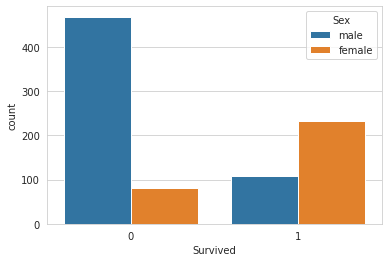

In [ ]:
#used a whitegrid with bar style graph plot
#graphing the number of survivers and the count 
#0 means dead and 1 means alive 
#blue means male and orange means female 
#more males died compared to females. by ~300+ males died 
#the double of females survived compared to males  
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

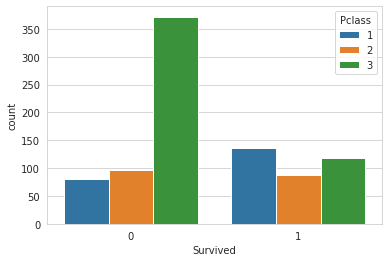

In [ ]:
#used a whitegrid with bar style graph plot
#graphing the number of survivers and the count 
#0 means dead and 1 means alive 
#each color is a class (possobly class status)
#blue means highest/richest class. less deaths  
#orange mid class. a little over the amount of deaths compared to the highest class  
#green lower class. the class that had more casualties 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

## Age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


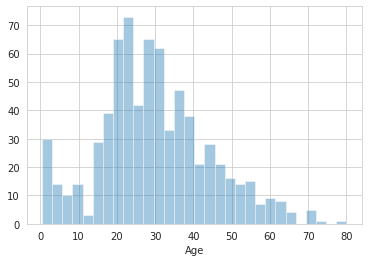

In [ ]:
#ploting the age of the passengers 
#dropping the nan values in age
#in the graph, we can see that there are more people in their 20s and 30s
#in the titanic 
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

## Siblings

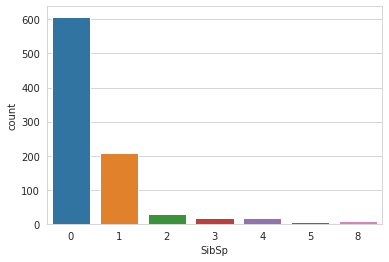

In [ ]:
#ploting 'sibsp' and its count
sns.countplot(x='SibSp',data=train)

# Data Cleaning and Data Pre - Processing

In [ ]:
#dropping/deleting the column cabin
train.drop('Cabin', axis=1, inplace= True)

In [ ]:
#making the drop permanent 
train.dropna(inplace=True)

In [ ]:
#getting sex and embark numerical values and then dropping them
#since it can cause difficults for manipulation of data 
#changing them to numerical values then dropping is advisable 
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
#dropping the columns below
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)

In [ ]:
#printing the first 5 elements after all the previous changes and droppings
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
#concat to put back the dropped columns 
train = pd.concat([train, sex, embark],axis=1)

In [ ]:
#printing the first 5 elements after all the previous changes
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model building

In [ ]:
#importing sklearn.model_selection to randomnize permutations to generate splits 
from sklearn.model_selection import train_test_split

In [ ]:
#training test for x and y 
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101) 

In [ ]:
#importing sklearn.linear_model to regularize the logistic regression 
from sklearn.linear_model import LogisticRegression

In [ ]:
#calling the logistic regression model 
logmodel = LogisticRegression()

In [ ]:
#fit x and y training test in the logistic model 
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicting the logistic model for test x 
predict = logmodel.predict(X_test)

## Classification report

In [ ]:
#importing the sklearn.metrics to get the classification report 
from sklearn.metrics import classification_report

In [ ]:
#printing the classification report for y test
#precision = precision of the prediction if it is false or true  
#recall =  when it is actualy yes, how often it predicts as yes 
#f1 score = is hthe weighted avg of precision and recall 
#support is the total number 
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       128
           1       0.72      0.70      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



## Confusion Matrix

In [ ]:
#importing the confusion matrix 
#printing its predictions 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[105  23]
 [ 26  60]]


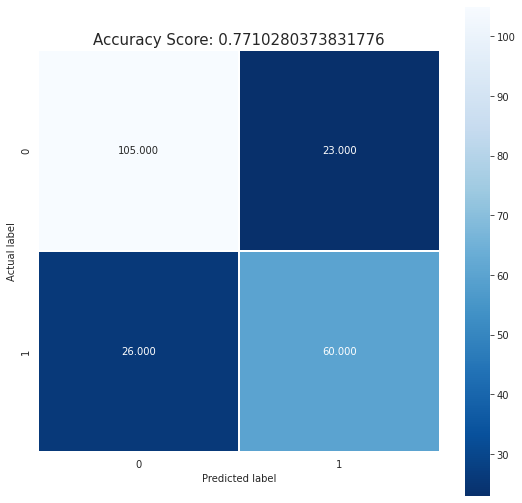

In [ ]:
#visualization of the confusion matrix 
#actual label and predicted label for death and alive based on age 
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
#importing sklearn 
from sklearn import  metrics

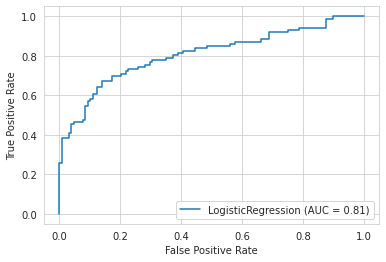

In [ ]:
#plotting x and y test and logisic model 
#the graph shows a logistic regression graph that is increasing 
metrics.plot_roc_curve(logmodel, X_test, y_test)  

Observation..

EDA: the graph shows a great number of missing age and cabin. I believe the missing data is due to the fact that the system in the titanic was not able to register all the passengers age and where all of them were allocated in the ship.

Class: survival chart shows the number of deaths in blue and the number of survivors in orange. 

Survived: the graph shows males and females survival bars. More males died compared to female desths and more females survived compard to males. Thid could have been caused due to the iconic phrase "women and child first" making so that males would be the last ones to be saved.

Age: the graph in this section shows the age of passengers. We can see that there are more people in their 20s and 30s.

Siblings: the gragh shows that majority of the passengers did not have siblings on board. 

Data Cleaning and Data Pre - 
Processing: in this section, the titanic data is cleaned, which means, some of the columns are dropped for a more organized and better visualization. It helps to narrow down the information we are actually trying to look at. The graph was printed with these columns only: passengerid, survive, pclass, age, parch and fare.

Model Cleaning: this section is based on the testing and training data. The data is using logistic regression to make predictions and actual numbers. 

Classification Report: printing the actual and predition numbers 

Confusion Matrix: visualization of the matrix with the help of model cleaning and classification report. 

# Conclusion...

# Based on my findings: 

1. More males died in the titanic tragedy then females. 

2. The class status made a difference in who survived. 

3. People in their 20s and 30s were the most unfortunate ones.

4. There is a great number of missing data from age and cabin due to possible errors in the ship's system.

5. Using a logistic regression algorithm helped in predicting the survival and death of the groups in the titanic. 
